In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import random
import torch

from src.action import Action
from src.agent import Agent
from src.config import Config
from src.episode import Episode
from src.policy import Policy
from src.state import State
from src.world import World
import src.utils as utils

# Random agent action history
----

In [2]:
episode = Episode.new()
episode.run_steps_by_random(steps=20)

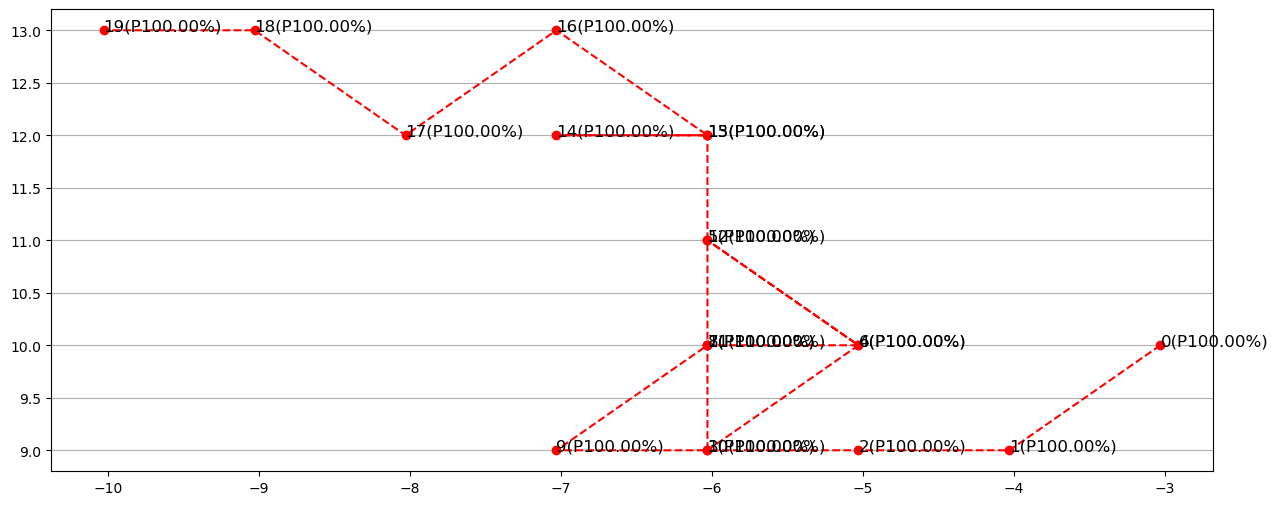

In [3]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

# Policy Guide agent action history
----

In [4]:
episode = Episode.new()
policy = Policy(config=episode.config)

episode.run_steps_by_policy(steps=20, policy=policy, debug=True)
print(f"episode gain: {episode.gain()}")

step: 0, logit_prob: tensor([0.9516]), top_k_prob: tensor([0.9537]), action_idx: tensor([6]), state: tensor([-4.9827, -7.5223])
step: 1, logit_prob: tensor([0.9524]), top_k_prob: tensor([0.9546]), action_idx: tensor([6]), state: tensor([-3.9827, -8.5223])
step: 2, logit_prob: tensor([0.9558]), top_k_prob: tensor([0.9580]), action_idx: tensor([6]), state: tensor([-2.9827, -9.5223])
step: 3, logit_prob: tensor([0.9563]), top_k_prob: tensor([0.9586]), action_idx: tensor([6]), state: tensor([ -1.9827, -10.0000])
step: 4, logit_prob: tensor([0.9432]), top_k_prob: tensor([0.9461]), action_idx: tensor([6]), state: tensor([ -0.9827, -10.0000])
step: 5, logit_prob: tensor([0.9171]), top_k_prob: tensor([0.9217]), action_idx: tensor([6]), state: tensor([  0.0173, -10.0000])
step: 6, logit_prob: tensor([0.0707]), top_k_prob: tensor([0.0714]), action_idx: tensor([5]), state: tensor([ 0.0173, -9.0000])
step: 7, logit_prob: tensor([0.8398]), top_k_prob: tensor([0.8524]), action_idx: tensor([6]), stat

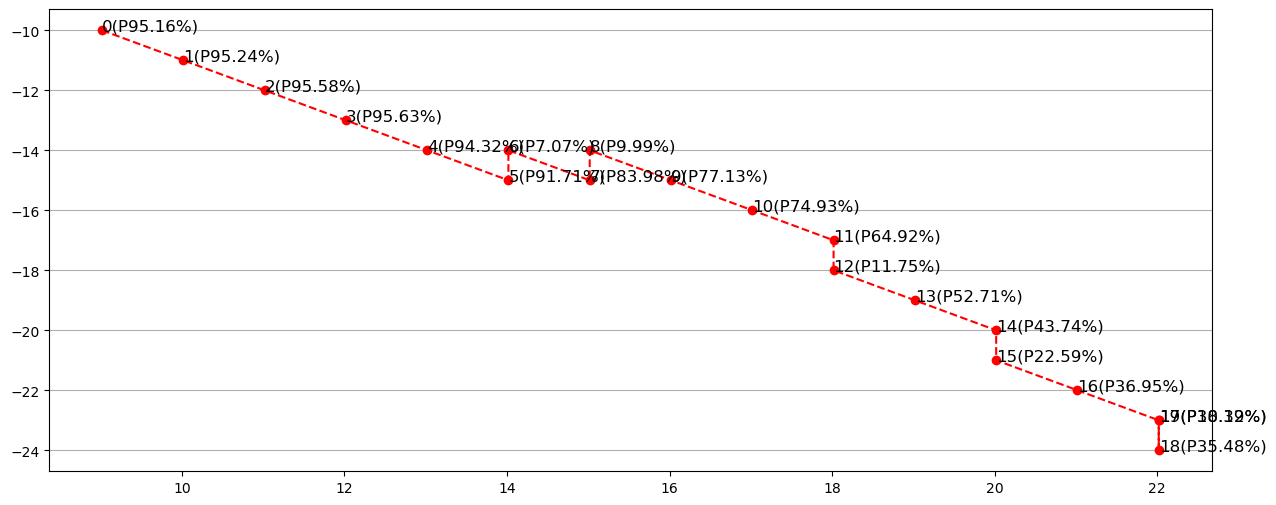

In [5]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

In [6]:
# episode.agent.action_history

# TRAIN Policy
----

In [7]:
episode = Episode.new()
policy = Policy(config=episode.config)

for epoch in range(episode.config.epoches):
    episode.train(steps=2, policy=policy, debug=False)
    print(f"episode gain: {episode.gain()}")

episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0
episode gain: 0


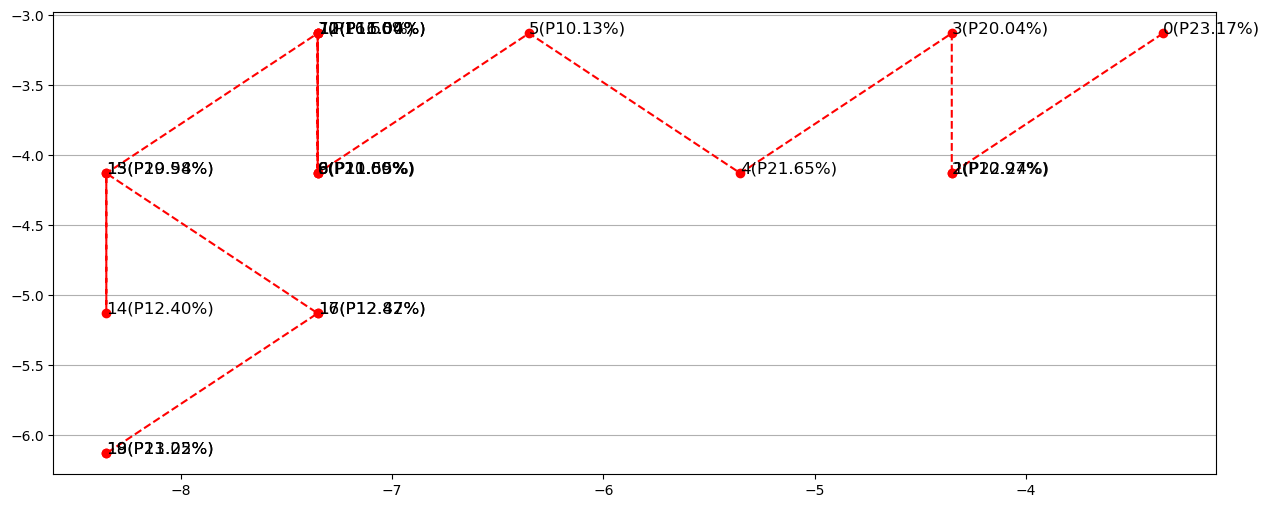

In [8]:
episode.run_steps_by_policy(steps=20, policy=policy, debug=False)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

In [9]:
logits = torch.range(0, 4)
print(logits)

utils.top_k_sampling(logits=logits, k=2)

tensor([0., 1., 2., 3., 4.])


/var/folders/lp/2szp3mwx2412g620qhnp3c680000gn/T/ipykernel_45102/1902084901.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  logits = torch.range(0, 4)


(tensor([3]), tensor([0.2341]), tensor([0.2689]))

In [10]:
torch.softmax(logits, dim=-1)

tensor([0.0117, 0.0317, 0.0861, 0.2341, 0.6364])

In [11]:
torch.softmax(torch.tensor([3.0, 4]), dim=-1)

tensor([0.2689, 0.7311])